In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

fecha = '05-13'
ds = '../../data/' + fecha + '-dataset.csv'
numerical_ds = '../../data/' + fecha + '-dataset-numerical.csv'

df = pd.read_csv(ds)
df = df.drop(columns=['user','replay','group'])
df_numerical = pd.read_csv(numerical_ds)

df_numerical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   197 non-null    int64  
 1   ActiveTime                   197 non-null    float64
 2   InactiveTime                 197 non-null    float64
 3   CreateShape                  197 non-null    int64  
 4   RotateShape                  197 non-null    int64  
 5   MoveShape                    197 non-null    int64  
 6   ScaleShape                   197 non-null    int64  
 7   DeleteFigure                 197 non-null    int64  
 8   RotateView                   197 non-null    int64  
 9   cube                         197 non-null    int64  
 10  pyramid                      197 non-null    int64  
 11  ramp                         197 non-null    int64  
 12  cylinder                     197 non-null    int64  
 13  cone                

In [2]:
df_numerical['snap_submit'].unique()

array([ 0,  2,  1,  9, 10,  4,  7,  3,  6, 21, 14, 20, 12, 24,  8,  5, 15,
       16, 18, 13, 29, 19], dtype=int64)

Vamos a comprobar cómo de bueno es el modelo usando todos los datos. Si los resultados no son buenos, como se espera, probaremos con un modelo para cada puzle.

In [3]:
X = df_numerical.drop(columns=['spatial_reasoning'])
y = df_numerical['spatial_reasoning']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

The r2 is:  0.7329588505972177


c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


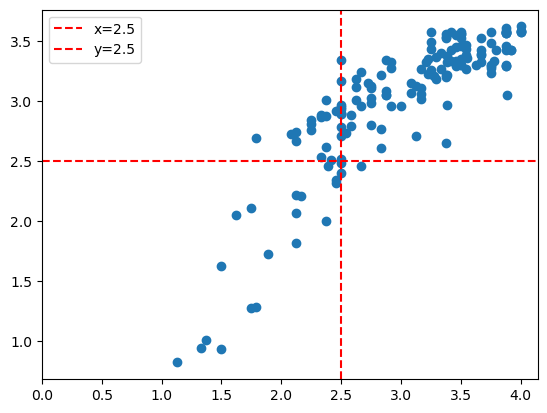

In [4]:
train_pred = model.predict(X_train)
r2 = r2_score(y_train, train_pred)
rmse = mean_squared_error(y_train, train_pred, squared=False)

print('The r2 is: ', r2)

plt.scatter(y_train,train_pred)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='r', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

#Ajustar límites
plt.axis('equal')
plt.xlim(left=0)

# Mostrar la gráfica
plt.show()



c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The r2 is:  0.5569323240260908


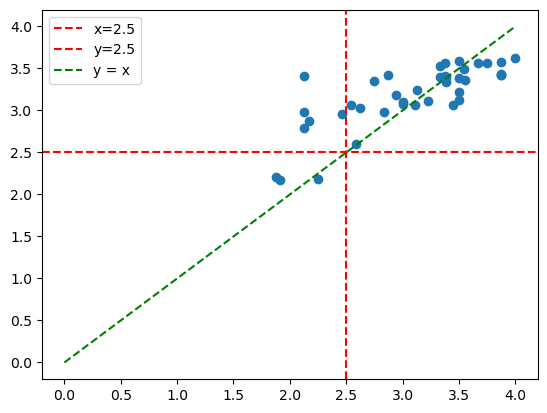

In [5]:
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)

plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='r', linestyle='--', label='y=2.5')

# Generar datos para la línea f(x) = x
x = np.linspace(0, max(y_train), 100)  # Asegúrate de que cubra el rango de tus datos
plt.plot(x, x, label='y = x', color='g', linestyle='--')  # Añade la gráfica de la función

# Mostrar la leyenda
plt.legend()
# Mostrar la gráfica
plt.show()


Vamos a probar quitando las figuras, puesto que son las características con menos correlación con la variable objetivo.

In [6]:
X = df_numerical.drop(columns=['spatial_reasoning','cube','sphere','ramp','cylinder','cone','pyramid'])
y = df_numerical['spatial_reasoning']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

for i in range(len(y_test)):
    print(y_test.iloc[i], predictions[i])

0.6387258794870709
The r2 is:  0.6387258794870709
The rmse is:  0.3606227288008256
1.9166666666666663 2.242618613237568
3.555555555555556 3.3410382585232767
3.875 3.4483354307929264
3.333333333333333 3.380479385247938
2.625 2.9623023244096993
3.5 3.3609476680921837
1.875 2.375426890781244
3.375 3.2361617579089974
3.6666666666666665 3.5068256758330767
3.388888888888889 3.331992899788182
2.1666666666666665 2.829240107131404
2.458333333333333 2.9306777559843686
3.111111111111111 3.0951509535504043
2.583333333333333 2.6371678623372183
3.875 3.4835522171580617
2.25 2.122182944639446
4.0 3.5783926457791058
3.0 3.0186566016767387
2.875 3.468904540463131
3.875 3.5569265196165754
3.375 3.5263218006162598
2.125 3.0017498260083846
3.5 3.064110571597093
3.125 3.2996490510017176
2.833333333333333 2.9046251752098953
3.222222222222222 3.0852738547605236
2.5416666666666665 3.198990791696774
3.5 3.187824352610131
2.125 2.813133967008972
3.5 3.588650378566554
3.388888888888889 3.3678215566440444
3.54166

c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


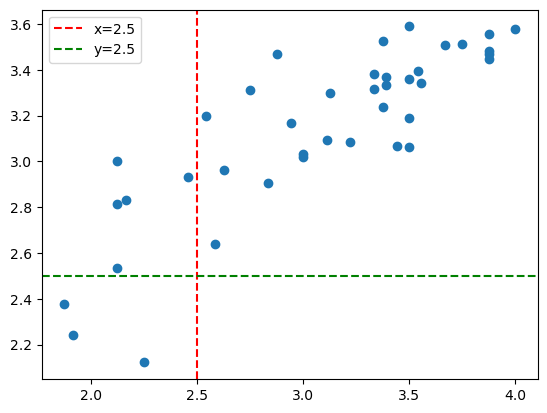

In [7]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


El resultado es muy parecido al anterior: 2 falsos positivos y 1 falso negativo. Vamos a probar con un modelo para cada puzle.

In [8]:
pi_henge = df.loc[df['puzzle']=='Pi Henge']
pi_henge = pi_henge.drop(columns=['puzzle'])
X = pi_henge.drop(columns=['spatial_reasoning'])
y = pi_henge['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  -0.8016663534359176
The rmse is:  0.7075420801383608


c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


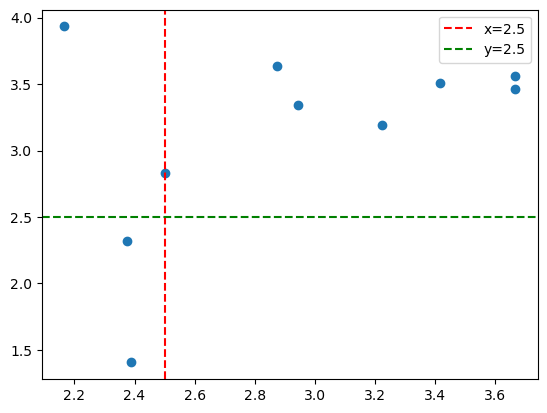

In [9]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [10]:
bird_fez = df.loc[df['puzzle']=='Bird Fez']
bird_fez = bird_fez.drop(columns=['puzzle'])
X = bird_fez.drop(columns=['spatial_reasoning'])
y = bird_fez['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  -0.05108172325948446
The rmse is:  0.41600796179035204


c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


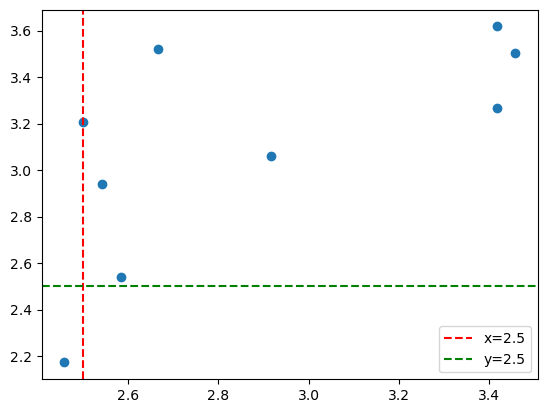

In [11]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [12]:
degree_rotations = df.loc[df['puzzle']=='45-Degree Rotations']
degree_rotations = degree_rotations.drop(columns=['puzzle'])
X = degree_rotations.drop(columns=['spatial_reasoning'])
y = degree_rotations['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  -120.3707071742405
The rmse is:  9.81282609378716


c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


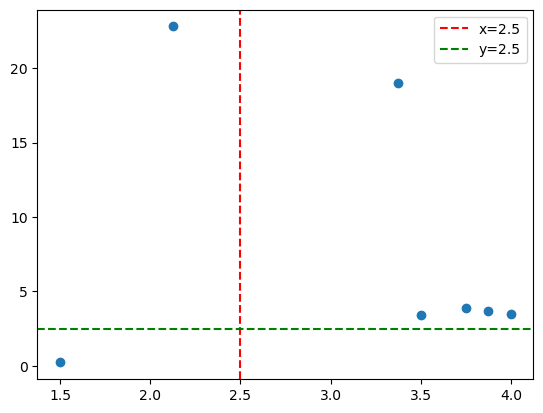

In [13]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [14]:
angled_silhouette = df.loc[df['puzzle']=='Angled Silhouette']
angled_silhouette = angled_silhouette.drop(columns=['puzzle'])
X = angled_silhouette.drop(columns=['spatial_reasoning'])
y = angled_silhouette['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.7934551543504658
The rmse is:  0.17841958609514347


c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


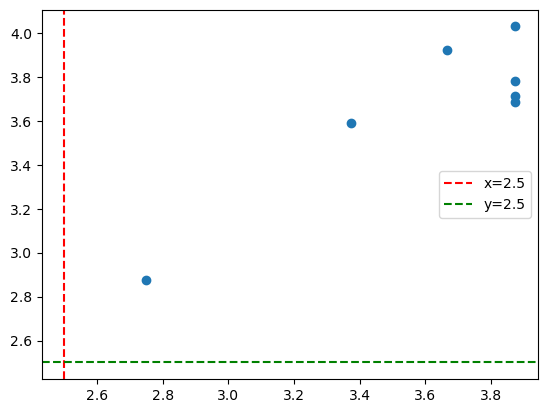

In [15]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [16]:
pyramids = df.loc[df['puzzle']=='Pyramids are Strange']
pyramids = pyramids.drop(columns=['puzzle'])
X = pyramids.drop(columns=['spatial_reasoning'])
y = pyramids['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.48324772537360783
The rmse is:  0.41116261894607475


c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


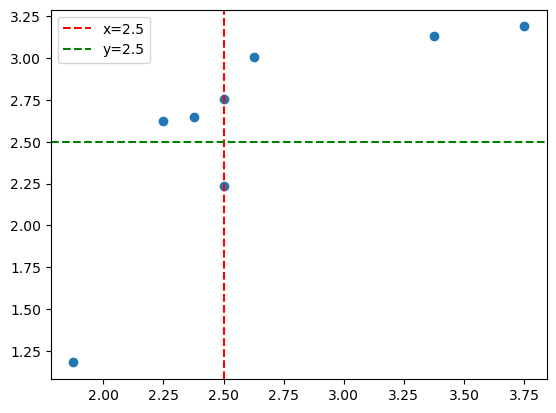

In [17]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


La regresión lineal funciona bastante bien para este problema.